### PS1-1 Linear Classifiers (logistic regression and GDA)

## (f)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.util as util

from src.linear_model import LinearModel

In [2]:
ds1_training_set_path = 'data/ds1_train.csv'
ds1_valid_set_path = 'data/ds1_valid.csv'
ds2_training_set_path = 'data/ds2_train.csv'
ds2_valid_set_path = 'data/ds2_valid.csv'

In [3]:
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)

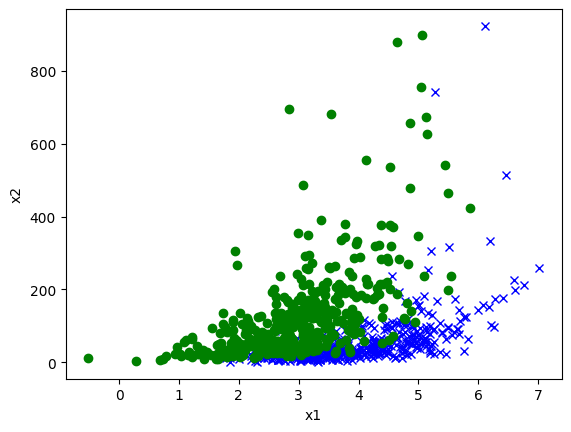

In [4]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2)
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'go', linewidth=2)

### using Logistic regression

In [5]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        self.theta = np.zeros(n)

        # Newton's method
        while True:
            # Save old theta
            theta_old = np.copy(self.theta)
            
            # Compute Hessian Matrix
            h_x = 1 / (1 + np.exp(-x.dot(self.theta)))
            H = (x.T * h_x * (1 - h_x)).dot(x) / m
            gradient_J_theta = x.T.dot(h_x - y) / m

            # Updata theta
            self.theta -= np.linalg.inv(H).dot(gradient_J_theta)

            # End training
            if np.linalg.norm(self.theta-theta_old, ord=1) < self.eps:
                break
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return 1 / (1 + np.exp(-x.dot(self.theta)))
        # *** END CODE HERE ***


In [6]:
model = LogisticRegression()
model.fit(x_train, y_train)

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.0


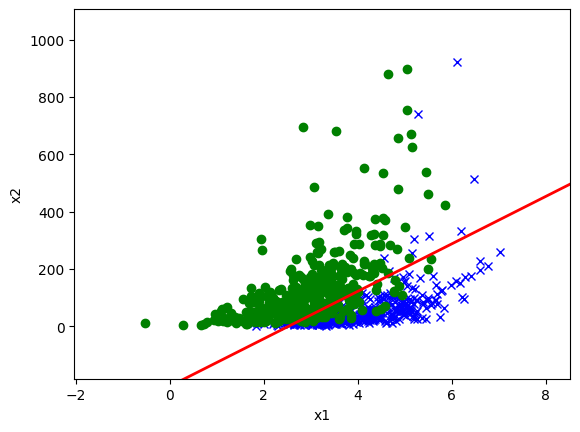

In [7]:
util.plot(x_train, y_train, theta=model.theta)
print("Theta is: ", model.theta)
print("The accuracy on training set is: ", np.mean(model.predict(x_train) == y_train))

The accuracy on validation set is:  0.0


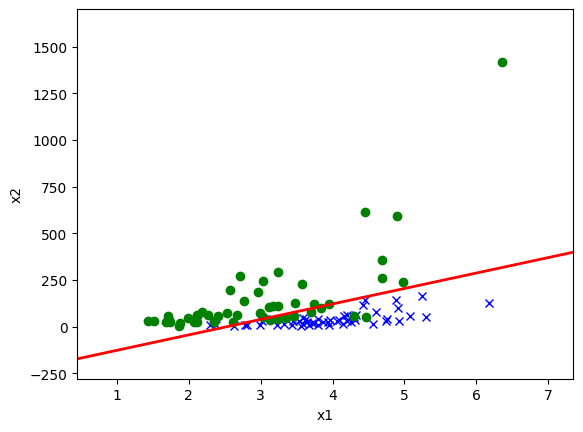

In [8]:
util.plot(x_valid, y_valid, model.theta)
print("The accuracy on validation set is: ", np.mean(model.predict(x_valid) == y_valid))

### Using GDA

In [9]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m, n = x.shape
        self.theta = np.zeros(n+1)

        y_1 = sum(y == 1)
        phi = y_1/m
        mu_0 = np.sum(x[y==0], axis=0)/(m-y_1)
        mu_1 = np.sum(x[y==1], axis=0)/ y_1
        sigma = ((x[y == 0] - mu_0).T.dot(x[y == 0] - mu_0) + (x[y == 1] - mu_1).T.dot(x[y == 1] - mu_1)) / m

        sigma_inv = np.linalg.inv(sigma)
        self.theta[0] = 0.5 * (mu_0 + mu_1).dot(sigma_inv).dot(mu_0 - mu_1) - np.log((1 - phi) / phi)
        self.theta[1:] = sigma_inv.dot(mu_1 - mu_0)
        return self.theta

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return 1 / (1 + np.exp(-x.dot(self.theta)))
        # *** END CODE HERE

In [10]:
x_train, y_train = util.load_dataset(ds1_training_set_path)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path)

In [11]:
GDA_model = GDA()
Theta = GDA_model.fit(x_train, y_train)

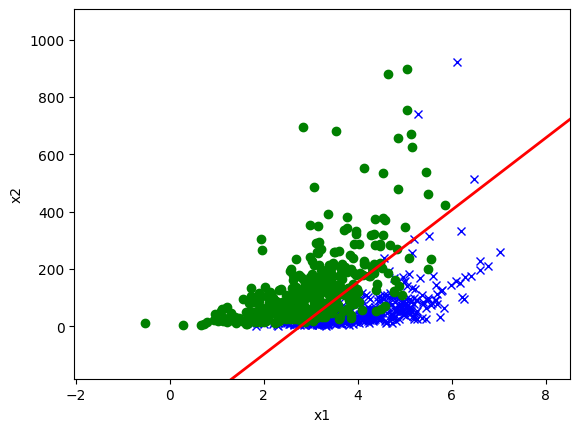

In [15]:
util.plot(x_train, y_train, theta=GDA_model.theta)

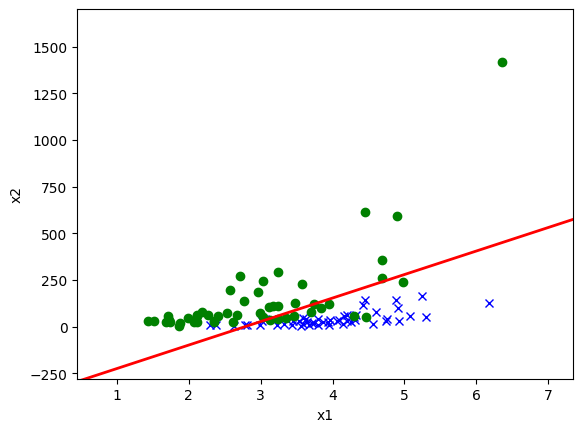

In [16]:
util.plot(x_valid, y_valid, theta=GDA_model.theta)